In [17]:
%pip install xarray

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/protocol.py", 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import NearestNDInterpolator

#np.version.version

In [2]:
ds = xr.open_dataset("mets/input_temp15.nc", engine="netcdf4")
ds_2 = xr.open_dataset("mets/input15.nc", engine="netcdf4")

/tmp/ipykernel_56287/3067810431.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset("mets/input_temp15.nc", engine="netcdf4")
/tmp/ipykernel_56287/3067810431.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_2 = xr.open_dataset("mets/input15.nc", engine="netcdf4")


In [3]:
print(ds)

<xarray.Dataset> Size: 116kB
Dimensions:                              (altitude: 30, time: 120)
Coordinates:
  * altitude                             (altitude) float32 120B 0.1109 ... 4...
  * time                                 (time) timedelta64[ns] 960B 00:00:00...
Data variables:
    pressure                             (altitude) float32 120B ...
    temperature                          (altitude, time) float32 14kB ...
    specific_cloud_liquid_water_content  (altitude, time) float32 14kB ...
    specific_cloud_ice_water_content     (altitude, time) float32 14kB ...
    specific_humidity                    (altitude, time) float32 14kB ...
    fraction_of_cloud_cover              (altitude, time) float32 14kB ...
    moist_density                        (altitude, time) float32 14kB ...
    cloud_LWC                            (altitude, time) float32 14kB ...
    cloud_IWC                            (altitude, time) float32 14kB ...


In [4]:
print(ds["pressure"].values)
print(ds["moist_density"].values)

[1000.        975.        950.        925.        900.        875.
  850.        825.        800.        750.        700.        650.
  600.        550.        500.00003   450.        400.        350.
  299.99997   250.        200.        150.        100.         70.00001
   50.00001    30.000006   19.999998   10.          5.          1.      ]
[[1.1686329  1.1686755  1.1687204  ... 1.1718314  1.1717917  1.1717533 ]
 [1.139417   1.1394587  1.1395023  ... 1.1425356  1.142497   1.1424594 ]
 [1.1166112  1.1166427  1.1166741  ... 1.1183758  1.1183292  1.1182829 ]
 ...
 [0.01543671 0.01544088 0.01544539 ... 0.01581184 0.01580919 0.0158067 ]
 [0.00761201 0.007614   0.0076159  ... 0.00735052 0.00735013 0.0073495 ]
 [0.0015224  0.0015228  0.00152318 ... 0.0014701  0.00147003 0.0014699 ]]


In [5]:
#indices = np.where(np.isfinite(ds["temperature"]))
#interp = NearestNDInterpolator(np.transpose(indices), ds["temperature"].values[indices])
#ds["temperature"][...] = interp(*np.indices(ds["temperature"].shape)) 

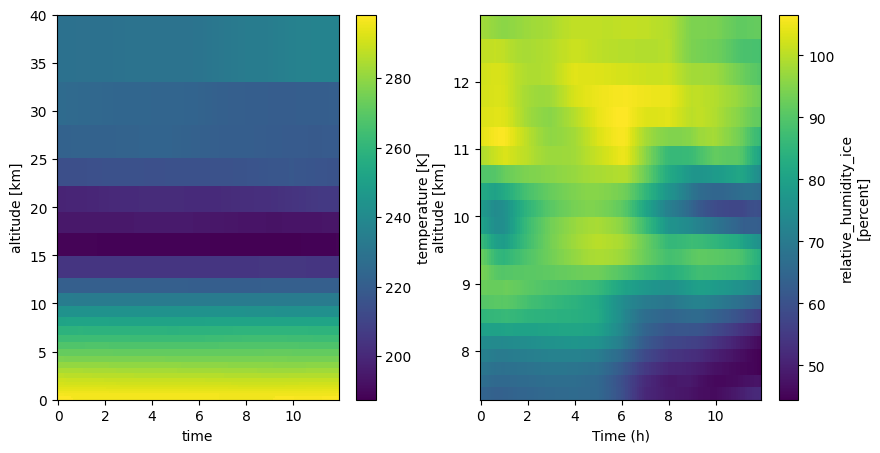

In [6]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ds.coords['time'] = ds.coords['time'].astype('float')/(10**9 * 60 * 60)
ds["temperature"].plot(ax = axes[0])

axes[0].set_ylim(0,40)

ds_2.coords['time'] = ds_2.coords['time'].astype('float')/(10**9 * 60 * 60)
ds_2["relative_humidity_ice"].plot(ax = axes[1])

plt.xlabel("Time (h)")
plt.show()




In [7]:
ds_2["temperature"].sel(time=0,altitude=10.9,method='nearest').values

array(228.57863, dtype=float32)

In [8]:
#ds["specific_cloud_liquid_water_content"] = ds["specific_cloud_liquid_water_content"].fillna(0)
#ds["specific_cloud_ice_water_content"] = ds["specific_cloud_ice_water_content"].fillna(0)

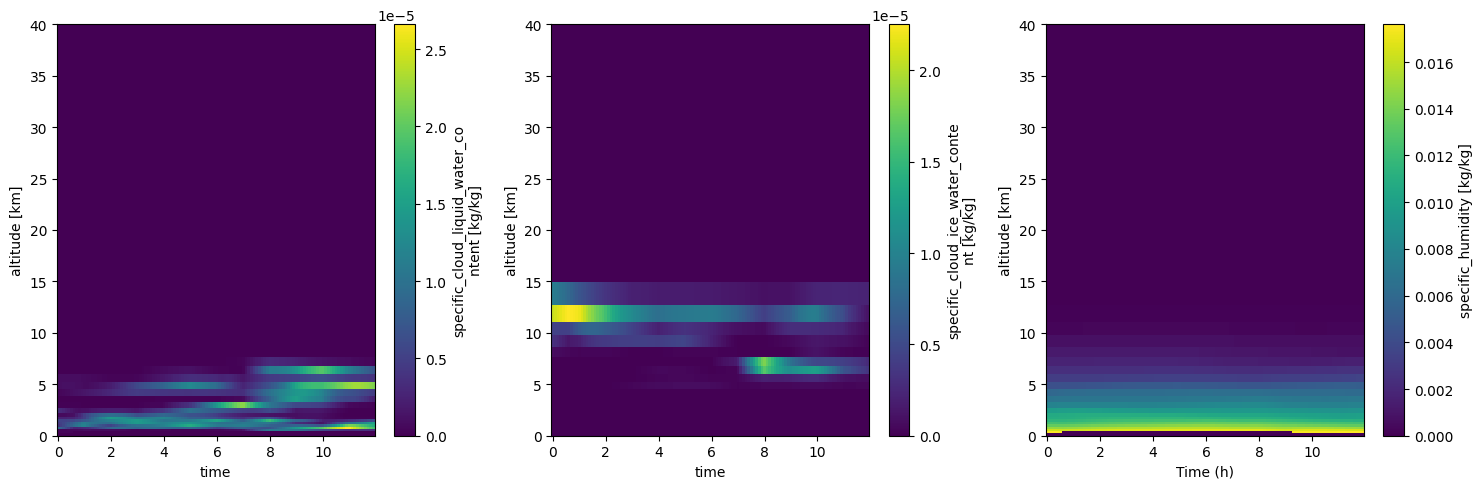

In [9]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ds["specific_cloud_liquid_water_content"].plot(ax = axes[0])
ds["specific_cloud_ice_water_content"].plot(ax = axes[1])
ds["specific_humidity"].plot(ax = axes[2])

axes[0].set_ylim(0,40)
axes[1].set_ylim(0,40)
axes[2].set_ylim(0,40)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

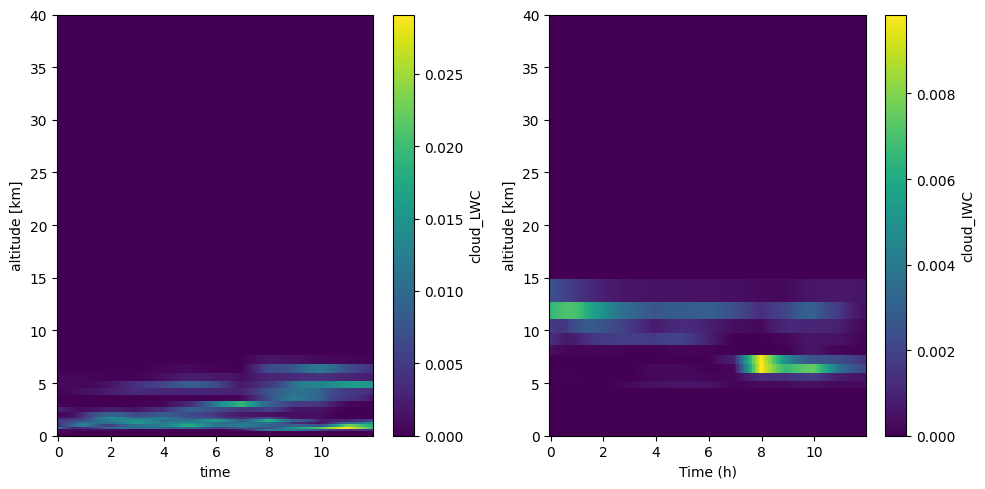

In [10]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ds["cloud_LWC"].plot(ax = axes[0])
ds["cloud_IWC"].plot(ax = axes[1])

axes[0].set_ylim(0,40)
axes[1].set_ylim(0,40)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

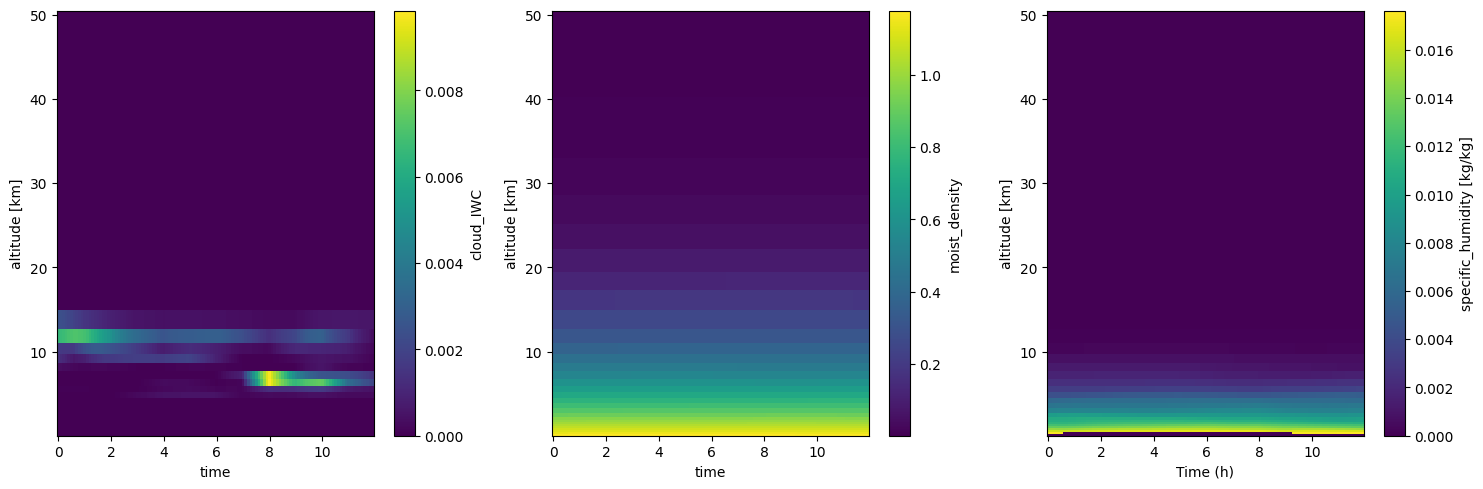

In [11]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ds["cloud_IWC"].plot(ax = axes[0])
ds["moist_density"].plot(ax = axes[1])
ds["specific_humidity"].plot(ax = axes[2])

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

[0.0000000e+00 9.1816095e-04 5.9933322e-03 6.0390189e-02 1.7693594e-02
 1.5059576e-02 9.4927428e-03 3.7250379e-03 1.2964073e-03 7.5335717e-03
 3.9971161e-05 0.0000000e+00 1.0517149e-03 3.0273055e-03 5.4403082e-03
 3.3205079e-09 7.9890294e-10 1.5246064e-03 3.3601379e-01 6.8699248e-02
 7.8289419e-01 9.1938412e-01 1.3744619e-02 3.4954373e-09 3.1995289e-15
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


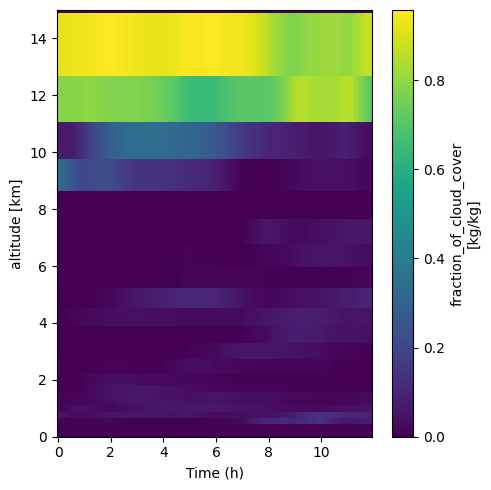

In [12]:

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ds["fraction_of_cloud_cover"].plot(ax = axes)

axes.set_ylim(0,15)

eee = ds.sel(time = 0, method='nearest')
print((eee["fraction_of_cloud_cover"]).values)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

In [13]:
%pip install openpyxl

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/protocol.py", 

In [14]:
import pandas as pd

In [15]:
df = pd.read_pickle("flight_data/flightlist_20190101_20190131.pkl")

In [30]:
import cdsapi

client = cdsapi.Client()

dataset = 'reanalysis-era5-complete'
request = {
  'product_type': ['reanalysis'],
  'variable': ['geopotential'],
  'year': ['2024'],
  'month': ['03'],
  'day': ['01'],
  'time': ['13:00'],
  'data_format': 'grib',
}
target = 'download.grib'

client.retrieve(dataset, request, target)

2025-04-02 13:08:38,607 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-02 13:08:38,609 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-04-02 13:08:38,816 INFO Request ID is ece4d0cb-7d1a-47e2-b759-f2958b6ecb11
2025-04-02 13:08:38,893 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attemps 1 of 500
Retrying in 120 seconds


KeyboardInterrupt: 

In [24]:
from pycontrails.datalib.ecmwf import ERA5ModelLevel

In [31]:
era5 = ERA5ModelLevel(
    time=("2020-03-01 00:00:00", "2020-03-01 03:00:00"),
    variables=["t", "q", "u", "v", "w", "ciwc"],
    grid=1.0,
)
era5

ERA5ModelLevel
	Timesteps: ['2020-03-01 00', '2020-03-01 01', '2020-03-01 02', '2020-03-01 03']
	Variables: ['t', 'q', 'u', 'v', 'w', 'ciwc']
	Pressure levels: [121, 127, 134, 141, 148, 155, 163, 171, 180, 188, 197, 207, 217, 227, 237, 248, 260, 272, 284, 297, 310, 323, 337, 352, 367, 383, 399, 416, 433, 451]
	Grid: 1.0
	Dataset: reanalysis-era5-complete
	Product type: reanalysis

In [ ]:
met_ml = era5.open_metdataset()

2025-04-02 13:09:50,331 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-02 13:09:50,332 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-04-02 13:09:50,619 INFO Request ID is 29f315fd-171c-44ee-af6b-a43db3fe54ce
2025-04-02 13:09:50,709 INFO status has been updated to accepted
2025-04-02 13:09:51,147 INFO Request ID is 3decdbb4-ff9f-41c0-9f23-685e321db4b3
2025-04-02 13:09:51,424 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attemps 1 of 500
Retrying in 120 seconds
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end clos

KeyboardInterrupt: 

In [2]:
np.arange(1,138,1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137])

In [3]:
np.array([1,10,20])

array([ 1, 10, 20])